In [5]:
import pandas as pd  

# Load dataset
df = pd.read_csv("final_cleaned_task3.csv")  

# Display first few rows
df.head()


,Age,Job,Marital Status,Education,Default,Housing Loan,Personal Loan,Contact,Month,Day,...,Campaign,Pdays,Previous,Poutcome,Emp. Var Rate,Cons. Price Index,Cons. Confidence Index,Euribor3m,Nr. Employed,Subscription (Target Variable)
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
print(df.columns)


Index(['Age', 'Job', 'Marital Status', 'Education', 'Default', 'Housing Loan',
       'Personal Loan', 'Contact', 'Month', 'Day', 'Duration', 'Campaign',
       'Pdays', 'Previous', 'Poutcome', 'Emp. Var Rate', 'Cons. Price Index',
       'Cons. Confidence Index', 'Euribor3m', 'Nr. Employed',
       'Subscription (Target Variable)'],
      dtype='object')


In [11]:
df.columns = df.columns.str.strip().str.lower()  # Remove spaces & lowercase


In [13]:
print(df.columns)

Index(['age', 'job', 'marital status', 'education', 'default', 'housing loan',
       'personal loan', 'contact', 'month', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp. var rate', 'cons. price index',
       'cons. confidence index', 'euribor3m', 'nr. employed',
       'subscription (target variable)'],
      dtype='object')


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check column names
print("Column Names:", df.columns)

# Ensure column names are properly formatted
df.columns = df.columns.str.strip().str.lower()

# Define categorical columns (check if they exist)
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

# Ensure all columns exist in the dataset
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Apply Label Encoding
encoder = LabelEncoder()
for col in existing_categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print("Encoding Complete. Check Data Types:")
print(df.info())


Column Names: Index(['age', 'job', 'marital status', 'education', 'default', 'housing loan',
       'personal loan', 'contact', 'month', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp. var rate', 'cons. price index',
       'cons. confidence index', 'euribor3m', 'nr. employed',
       'subscription (target variable)'],
      dtype='object')
Encoding Complete. Check Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             41187 non-null  int64  
 1   job                             41187 non-null  int32  
 2   marital status                  41187 non-null  object 
 3   education                       41187 non-null  int32  
 4   default                         41187 non-null  int32  
 5   housing loan                    41187 non-null  ob

In [19]:
# Fix column formatting
df.columns = df.columns.str.strip().str.lower()

# Check available columns
print("Available Columns:", df.columns)

# Define correct target column (modify if needed)
target_col = "y"  # Change this if the actual target column has a different name

# Verify if target column exists before proceeding
if target_col in df.columns:
    X = df.drop(columns=[target_col])  
    y = df[target_col]
    print("Data Successfully Split into Features (X) and Target (y)")
else:
    print(f"Error: Target column '{target_col}' not found. Check column names!")


Available Columns: Index(['age', 'job', 'marital status', 'education', 'default', 'housing loan',
       'personal loan', 'contact', 'month', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp. var rate', 'cons. price index',
       'cons. confidence index', 'euribor3m', 'nr. employed',
       'subscription (target variable)'],
      dtype='object')
Error: Target column 'y' not found. Check column names!


In [21]:
# Fix column formatting
df.columns = df.columns.str.strip().str.lower()

# Rename the target column for easier access
df.rename(columns={'subscription (target variable)': 'target'}, inplace=True)

# Now define features (X) and target variable (y)
X = df.drop(columns=['target'])  
y = df['target']

print("Data Successfully Split into Features (X) and Target (y)")


Data Successfully Split into Features (X) and Target (y)


In [23]:
print(df.head())  # Preview first few rows
print(df.info())  # Check updated column names and data types


   age  job marital status  education  default housing loan personal loan  \
0   57    7        married          3        1           no            no   
1   37    7        married          3        0          yes            no   
2   40    0        married          1        0           no            no   
3   56    7        married          3        0           no           yes   
4   45    7        married          2        1           no            no   

   contact  month  day  ...  campaign  pdays  previous  poutcome  \
0        1      6  mon  ...         1    999         0         1   
1        1      6  mon  ...         1    999         0         1   
2        1      6  mon  ...         1    999         0         1   
3        1      6  mon  ...         1    999         0         1   
4        1      6  mon  ...         1    999         0         1   

   emp. var rate  cons. price index  cons. confidence index  euribor3m  \
0            1.1             93.994                   

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['target'])  
y = df['target']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Successfully Split!")


Data Successfully Split!


In [31]:
print(df.dtypes)


age                         int64
job                         int32
marital status             object
education                   int32
default                     int32
housing loan               object
personal loan              object
contact                     int32
month                       int32
day                        object
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
poutcome                    int32
emp. var rate             float64
cons. price index         float64
cons. confidence index    float64
euribor3m                 float64
nr. employed              float64
target                     object
dtype: object


In [37]:
from sklearn.preprocessing import LabelEncoder  

categorical_cols = ['job', 'marital status', 'education', 'default', 'housing loan', 
                    'personal loan', 'contact', 'month', 'poutcome', 'target']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [39]:
from sklearn.preprocessing import LabelEncoder  

categorical_cols = ['job', 'marital status', 'education', 'default', 'housing loan', 
                    'personal loan', 'contact', 'month', 'poutcome', 'target']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [41]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [49]:
print(df.columns)


Index(['age', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'emp. var rate', 'cons. price index', 'cons. confidence index',
       'euribor3m', 'nr. employed', 'job_1', 'job_2', 'job_3', 'job_4',
       'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11',
       'marital status_1', 'marital status_2', 'marital status_3',
       'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'education_7', 'default_1', 'default_2',
       'housing loan_1', 'housing loan_2', 'personal loan_1',
       'personal loan_2', 'contact_1', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'poutcome_1', 'poutcome_2', 'target_1'],
      dtype='object')


In [53]:
print(df.dtypes)


age                         int64
day                        object
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
emp. var rate             float64
cons. price index         float64
cons. confidence index    float64
euribor3m                 float64
nr. employed              float64
job_1                        bool
job_2                        bool
job_3                        bool
job_4                        bool
job_5                        bool
job_6                        bool
job_7                        bool
job_8                        bool
job_9                        bool
job_10                       bool
job_11                       bool
marital status_1             bool
marital status_2             bool
marital status_3             bool
education_1                  bool
education_2                  bool
education_3                  bool
education_4                  bool
education_5   

In [61]:
from sklearn.preprocessing import LabelEncoder
df['day'] = LabelEncoder().fit_transform(df['day'])


In [63]:
X = df.drop(columns=['target_1'])  
y = df['target_1']


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)


Model Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7321
        True       0.64      0.49      0.55       917

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238



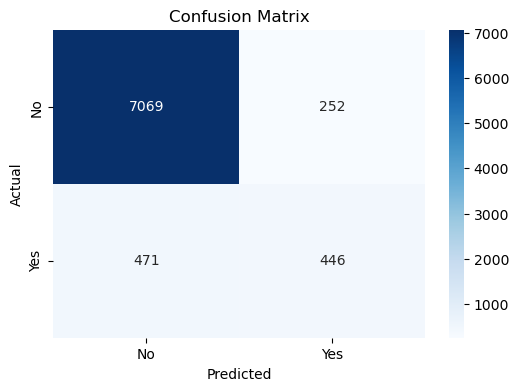

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
